# Credit Risk Scoring Project

## Imports for this project

In [308]:
import pandas as pd
import numpy as np
import wget
 
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## Downloading the dataset

# Previewing the CSV File

In [309]:
df = pd.read_csv("CreditScoring.csv")

In [310]:
df

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,2,1,1,60,39,2,1,1,69,92,0,0,900,1020
4451,1,22,2,60,46,2,1,1,60,75,3000,600,950,1263
4452,2,0,2,24,37,2,1,2,60,90,3500,0,500,963
4453,1,0,1,48,23,1,1,3,49,140,0,0,550,550


## Adapting Column Format

In [311]:
df.columns = df.columns.str.lower()

In [312]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


## Re-encoding the categorical variables

In [313]:
df.status.value_counts()

status
1    3200
2    1254
0       1
Name: count, dtype: int64

In [314]:
status = {1: "ok", 2: "default", 0: "unk"}

In [315]:
df.status = df.status.map(status)
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [316]:
home = {
    1: "rent",
    2: "owner",
    3: "private",
    4: "ignore",
    5: "parents",
    6: "other",
    0: "unk",
}
df.home = df.home.map(home)

marital = {
    1: "single",
    2: "married",
    3: "widow",
    4: "separated",
    5: "divorced",
    0: "unk",
}
df.marital = df.marital.map(marital)

records = {1: "no", 2: "yes", 0: "unk"}
df.records = df.records.map(records)

job = {1: "fixed", 2: "partime", 3: "freelance", 4: "others", 0: "unk"}
df.job = df.job.map(job)

df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [317]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [318]:
df.income.max()

np.int64(99999999)

In [319]:
df.income.replace(to_replace=99999999, value=np.nan).max()

np.float64(959.0)

In [320]:
df.assets.replace(to_replace=99999999, value=np.nan).max()

np.float64(300000.0)

In [321]:
df.debt.replace(to_replace=99999999, value=np.nan).max()

np.float64(30000.0)

In [322]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [323]:
for c in ["income", "assets", "debt"]:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


## Performing the train/validation/test split

In [324]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_train.status

0       default
1       default
2            ok
3       default
4       default
         ...   
2668         ok
2669    default
2670         ok
2671         ok
2672         ok
Name: status, Length: 2673, dtype: object

In [325]:
(df_train.status == 'default').astype('int')

0       1
1       1
2       0
3       1
4       1
       ..
2668    0
2669    1
2670    0
2671    0
2672    0
Name: status, Length: 2673, dtype: int64

In [326]:
y_train = (df_train.status == "default").astype("int").values
y_val = (df_val.status == "default").astype("int").values
y_test = (df_test.status == "default").astype("int").values

del df_train["status"]
del df_val["status"]
del df_test["status"]

df_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,3,rent,36,61,married,no,fixed,41,57.0,12000.0,0.0,2500,3559
1,5,rent,48,30,separated,yes,partime,39,41.0,0.0,0.0,1300,1600
2,15,owner,60,32,divorced,no,freelance,35,0.0,6000.0,3300.0,1550,1612
3,2,rent,12,47,married,yes,fixed,103,426.0,0.0,0.0,350,450
4,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2668,1,parents,60,21,single,no,partime,35,45.0,0.0,0.0,400,904
2669,5,rent,60,47,single,yes,fixed,46,106.0,8500.0,0.0,2500,2664
2670,23,rent,24,47,single,no,fixed,44,86.0,0.0,0.0,350,975
2671,5,owner,60,58,married,no,freelance,45,93.0,45000.0,0.0,1500,2090


In [327]:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == "parttime":
            return 'default'
        else:
            return 'ok'
    else:
        if client["assets"] > 6000:
            return "ok"
        else:
            return "default"

In [328]:
xi = df_train.iloc[0].to_dict()
xi

{'seniority': 3,
 'home': 'rent',
 'time': 36,
 'age': 61,
 'marital': 'married',
 'records': 'no',
 'job': 'fixed',
 'expenses': 41,
 'income': 57.0,
 'assets': 12000.0,
 'debt': 0.0,
 'amount': 2500,
 'price': 3559}

In [329]:
assess_risk(xi)

'ok'

## Training a decision tree

In [330]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [331]:
train_dicts = df_train.to_dict(orient="records")

In [332]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
X_train

array([[6.10e+01, 2.50e+03, 1.20e+04, ..., 0.00e+00, 3.00e+00, 3.60e+01],
       [3.00e+01, 1.30e+03, 0.00e+00, ..., 1.00e+00, 5.00e+00, 4.80e+01],
       [3.20e+01, 1.55e+03, 6.00e+03, ..., 0.00e+00, 1.50e+01, 6.00e+01],
       ...,
       [4.70e+01, 3.50e+02, 0.00e+00, ..., 0.00e+00, 2.30e+01, 2.40e+01],
       [5.80e+01, 1.50e+03, 4.50e+04, ..., 0.00e+00, 5.00e+00, 6.00e+01],
       [2.20e+01, 1.25e+03, 1.00e+04, ..., 0.00e+00, 4.00e+00, 4.80e+01]],
      shape=(2673, 28))

In [333]:
dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=partime', 'marital=divorced', 'marital=married',
       'marital=separated', 'marital=single', 'marital=unk',
       'marital=widow', 'price', 'records=no', 'records=yes', 'seniority',
       'time'], dtype=object)

## Train the Decision Trees

In [334]:
# Validation dataset
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

val_dicts = df_val.to_dict(orient="records")
X_val = dv.transform(val_dicts)
y_pred = dt.predict_proba(X_val)[:, 1]

roc_auc_score(y_val, y_pred)

0.6601688525198086

## Overfitting

In [335]:
# Training dataset
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

In [336]:
# Train with a max_depth of 3
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

# Make a prediction with the training data
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print("train", auc)


# Make a prediction with validation data
y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print("validation", auc)

train 0.7654807474207559
validation 0.7530253773223402


In [337]:
from sklearn.tree import export_text
names = dv.get_feature_names_out().tolist()
print(export_text(dt, feature_names=names))

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- income <= 50.50
|   |   |   |--- class: 1
|   |   |--- income >  50.50
|   |   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- income <= 99.50
|   |   |   |--- class: 1
|   |   |--- income >  99.50
|   |   |   |--- class: 0
|--- records=no >  0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 73.50
|   |   |   |--- class: 0
|   |   |--- income >  73.50
|   |   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- time <= 27.00
|   |   |   |--- class: 0
|   |   |--- time >  27.00
|   |   |   |--- class: 1



## Decision Stump

In [338]:
dt = DecisionTreeClassifier(max_depth=1)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print("train", auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print("val", auc)

train 0.6271176710091984
val 0.6131750701491985


## Visualizing Decision Stump

In [339]:
from sklearn.tree import export_text

print(export_text(dt))

|--- feature_25 <= 0.50
|   |--- class: 0
|--- feature_25 >  0.50
|   |--- class: 1



In [340]:
names = dv.get_feature_names_out().tolist()
print(export_text(dt, feature_names=names))

|--- records=yes <= 0.50
|   |--- class: 0
|--- records=yes >  0.50
|   |--- class: 1



## Decision tree with depth of 2

In [341]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print("train", auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print("val", auc)

train 0.7017132266649385
val 0.6876073869887143


## Visualizing Decision tree

In [342]:
print(export_text(dt))

|--- feature_24 <= 0.50
|   |--- feature_26 <= 6.50
|   |   |--- class: 1
|   |--- feature_26 >  6.50
|   |   |--- class: 0
|--- feature_24 >  0.50
|   |--- feature_16 <= 0.50
|   |   |--- class: 0
|   |--- feature_16 >  0.50
|   |   |--- class: 1



In [343]:
names = dv.get_feature_names_out().tolist()
print(export_text(dt, feature_names=names))

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- class: 0
|--- records=no >  0.50
|   |--- job=partime <= 0.50
|   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- class: 1



In [344]:
data = [
    [8000, "default"],
    [2000, "default"],
    [0, "default"],
    [5000, "ok"],
    [5000, "ok"],
    [4000, "ok"],
    [9000, "ok"],
    [3000, "default"],
]

df_example = pd.DataFrame(data, columns=["assets", "status"])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [345]:
df_example.sort_values("assets")

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
4,5000,ok
3,5000,ok
0,8000,default
6,9000,ok


In [346]:
Ts = [0, 2000, 3000, 4000, 5000, 8000]

In [347]:
from IPython.display import display

for T in Ts:
    print(T)
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]

    display(df_left)
    display(df_right)

    print()

0


,assets,status
2,0,default


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default



2000


,assets,status
1,2000,default
2,0,default


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default



3000


,assets,status
1,2000,default
2,0,default
7,3000,default


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok



4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok



5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


,assets,status
0,8000,default
6,9000,ok



8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


,assets,status
6,9000,ok


In [348]:
T = 4000
df_left = df_example[df_example.assets <= T]
df_right = df_example[df_example.assets > T]

display(df_left)
display(df_right)

,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


## Misclassification Rate

In [349]:
T = 4000
df_left = df_example[df_example.assets <= T]
df_right = df_example[df_example.assets > T]

display(df_left)
print(df_left.status.value_counts(normalize=True))
display(df_right)
print(df_right.status.value_counts(normalize=True))

,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64


## Impurity

In [350]:
for T in Ts:
    print(T)
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]

    display(df_left)
    print(df_left.status.value_counts(normalize=True))
    display(df_right)
    print(df_right.status.value_counts(normalize=True))

    print()

0


,assets,status
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

2000


,assets,status
1,2000,default
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

3000


,assets,status
1,2000,default
2,0,default
7,3000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,status
0,8000,default
6,9000,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,status
6,9000,ok


status
ok    1.0
Name: proportion, dtype: float64



## Finding the best split for two columns

In [351]:
data = [
    [8000, 3000, "default"],
    [2000, 1000, "default"],
    [0, 1000, "default"],
    [5000, 1000, "ok"],
    [5000, 1000, "ok"],
    [4000, 1000, "ok"],
    [9000, 500, "ok"],
    [3000, 2000, "default"],
]

df_example = pd.DataFrame(data, columns=["assets", "debt", "status"])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [352]:
df_example.sort_values("debt")

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
3,5000,1000,ok
2,0,1000,default
5,4000,1000,ok
4,5000,1000,ok
7,3000,2000,default
0,8000,3000,default


In [353]:
thresholds = {"assets": [0, 2000, 3000, 4000, 5000, 8000], "debt": [500, 1000, 2000]}

for feature, Ts in thresholds.items():
    print("#####################")
    print(feature)
    for T in Ts:
        print(T)
        df_left = df_example[df_example[feature] <= T]
        df_right = df_example[df_example[feature] > T]

        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        display(df_right)
        print(df_right.status.value_counts(normalize=True))

        print()
    print("#####################")

#####################
assets
0


,assets,debt,status
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64

#####################
#####################
debt
500


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64

1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default


status
default    1.0
Name: proportion, dtype: float64

#####################


## Decision trees parameter tuning
- selecting max_depth
- selecting min_samples_leaf

In [354]:
# Selecting max_depth
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)

    # remember we need the column with negative scores
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    print("%4s -> %.3f" % (depth, auc))

   1 -> 0.613
   2 -> 0.688
   3 -> 0.753
   4 -> 0.765
   5 -> 0.762
   6 -> 0.761
  10 -> 0.686
  15 -> 0.647
  20 -> 0.651
None -> 0.655


In [355]:
# Selecting min_samples_leaf
scores = []

for d in [4, 5, 6]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, s, auc))

columns = ["max_depth", "min_samples_leaf", "auc"]
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,min_samples_leaf,auc
0,4,1,0.664492
1,4,2,0.682691
2,4,5,0.731325
3,4,10,0.766749
4,4,15,0.769490


In [356]:
df_scores.sort_values(by="auc", ascending=False).head()

,max_depth,min_samples_leaf,auc
15,5,100,0.784274
24,6,100,0.784274
6,4,100,0.784110
23,6,20,0.782170
14,5,20,0.781845


In [357]:
# index - rows
df_scores_pivot = df_scores.pivot(
    index="min_samples_leaf", columns=["max_depth"], values=["auc"]
)
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.664  0.652  0.661
2                 0.683  0.682  0.693
5                 0.731  0.734  0.731
10                0.767  0.761  0.764
15                0.769  0.771  0.770
20                0.782  0.782  0.782
100               0.784  0.784  0.784
200               0.780  0.780  0.780
500               0.671  0.671  0.671

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

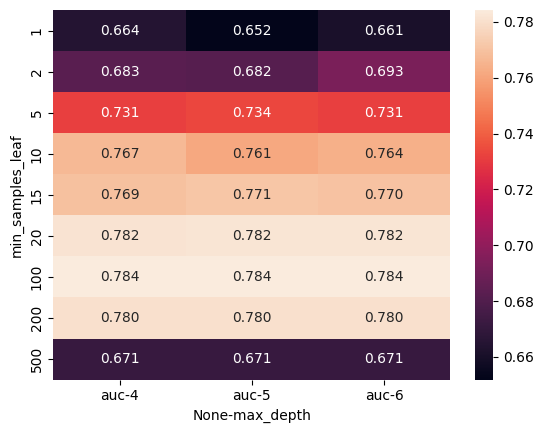

In [358]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [359]:
scores = []

for d in [4, 5, 6, 7, 10, 15, 20, None]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, s, auc))

columns = ["max_depth", "min_samples_leaf", "auc"]
df_scores = pd.DataFrame(scores, columns=columns)

df_scores.sort_values(by="auc", ascending=False).head()

,max_depth,min_samples_leaf,auc
6,4.0,100,0.784274
51,15.0,100,0.784274
42,10.0,100,0.784274
24,6.0,100,0.784274
15,5.0,100,0.784110


In [360]:
df_scores_pivot = df_scores.pivot(
    index="min_samples_leaf", columns=["max_depth"], values=["auc"]
)
df_scores_pivot.round(3)

auc                                                 
max_depth           NaN   4.0    5.0    6.0    7.0    10.0   15.0   20.0
min_samples_leaf                                                        
1                 0.664  0.650  0.664  0.648  0.667  0.653  0.663  0.655
2                 0.679  0.683  0.691  0.684  0.691  0.683  0.677  0.692
5                 0.737  0.741  0.734  0.737  0.735  0.732  0.736  0.731
10                0.762  0.767  0.770  0.769  0.765  0.764  0.766  0.771
15                0.771  0.772  0.771  0.770  0.770  0.771  0.772  0.773
20                0.783  0.781  0.782  0.783  0.781  0.780  0.782  0.782
100               0.784  0.784  0.784  0.784  0.784  0.784  0.784  0.784
200               0.780  0.780  0.780  0.780  0.780  0.780  0.780  0.780
500               0.671  0.671  0.671  0.671  0.671  0.671  0.671  0.671

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

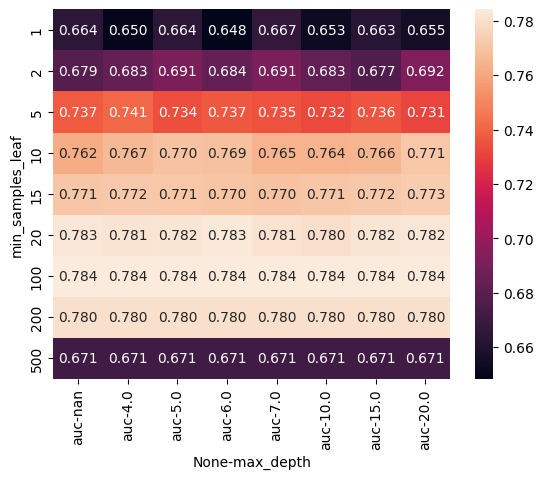

In [361]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [362]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,15
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Random forest – ensembling decision trees

In [363]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7975283996093896

In [364]:
rf.predict_proba(X_val[[0]])

array([[0.8, 0.2]])

In [365]:
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7852600155749762

In [366]:
rf.predict_proba(X_val[[0]])

array([[0.9, 0.1]])

## Tuning random forest

In [367]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    scores.append((n, auc))

df_scores = pd.DataFrame(scores, columns=["n_estimators", "auc"])
df_scores

,n_estimators,auc
0,10,0.785260
1,20,0.813681
2,30,0.821531
3,40,0.824905
4,50,0.826497
5,60,0.829683
6,70,0.827791
7,80,0.829609
8,90,0.829315
9,100,0.828799


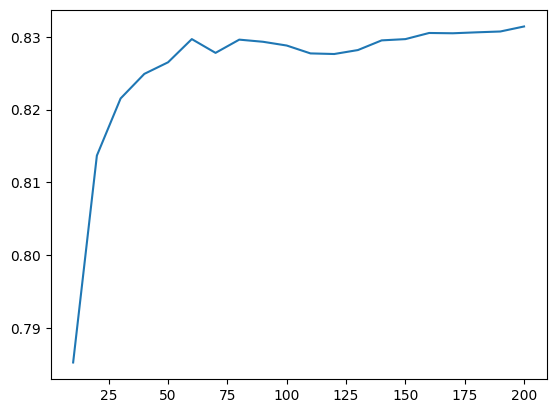

In [368]:
# x-axis - n_estimators
# y-axis - auc score
plt.plot(df_scores.n_estimators, df_scores.auc)

In [369]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

columns = ["max_depth", "n_estimators", "auc"]
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.818051
1,5,20,0.821623
2,5,30,0.819343
3,5,40,0.823440
4,5,50,0.826185


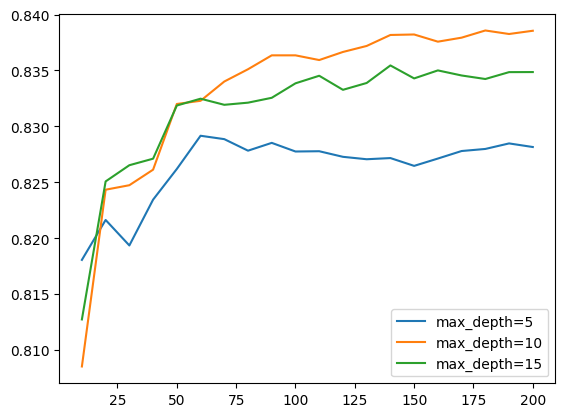

In [370]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]

    plt.plot(df_subset.n_estimators, df_subset.auc, label="max_depth=%d" % d)

plt.legend()

In [371]:
# Let's select 10 as the best value
max_depth = 10

In [372]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(
            n_estimators=n, max_depth=max_depth, min_samples_leaf=s, random_state=1
        )
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

columns = ["min_samples_leaf", "n_estimators", "auc"]
df_scores = pd.DataFrame(scores, columns=columns)

In [373]:
colors = ["black", "blue", "orange", "red", "grey"]
min_samples_leaf_values = [1, 3, 5, 10, 50]
list(zip(min_samples_leaf_values, colors))

[(1, 'black'), (3, 'blue'), (5, 'orange'), (10, 'red'), (50, 'grey')]

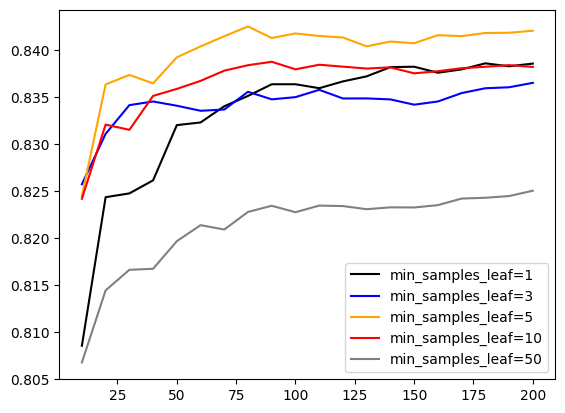

In [374]:
colors = ["black", "blue", "orange", "red", "grey"]
min_samples_leaf_values = [1, 3, 5, 10, 50]

for s, col in zip(min_samples_leaf_values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]

    plt.plot(
        df_subset.n_estimators,
        df_subset.auc,
        color=col,
        label="min_samples_leaf=%d" % s,
    )

plt.legend()

In [375]:
# Let's select 3 as the best value
min_samples_leaf = 3

In [376]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=max_depth,
    min_samples_leaf=min_samples_leaf,
    random_state=1,
    n_jobs=-1,
)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Gradient boosting and XGBoost

In [377]:
import xgboost as xgb

In [378]:
features = dv.get_feature_names_out().tolist()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [379]:
xgb_params = {
    "eta": 0.3,
    "max_depth": 6,
    "min_child_weight": 1,
    "objective": "binary:logistic",
    "nthread": 8,
    "seed": 1,
    "verbosity": 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [380]:
y_pred = model.predict(dval)

In [381]:
roc_auc_score(y_val, y_pred)

0.8246115526767945

In [382]:
watchlist = [(dtrain, "train"), (dval, "val")]

In [383]:
xgb_params = {
    "eta": 0.3,
    "max_depth": 6,
    "min_child_weight": 1,
    "objective": "binary:logistic",
    "nthread": 8,
    "seed": 1,
    "verbosity": 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200, evals=watchlist)

[0]	train-logloss:0.50031	val-logloss:0.53467
[1]	train-logloss:0.44976	val-logloss:0.50753
[2]	train-logloss:0.41323	val-logloss:0.48757
[3]	train-logloss:0.38507	val-logloss:0.47607
[4]	train-logloss:0.36564	val-logloss:0.46688
[5]	train-logloss:0.35134	val-logloss:0.45951
[6]	train-logloss:0.33492	val-logloss:0.45866
[7]	train-logloss:0.32058	val-logloss:0.45298
[8]	train-logloss:0.31140	val-logloss:0.45034
[9]	train-logloss:0.30083	val-logloss:0.44992
[10]	train-logloss:0.29205	val-logloss:0.45076
[11]	train-logloss:0.28230	val-logloss:0.44827
[12]	train-logloss:0.27733	val-logloss:0.44687
[13]	train-logloss:0.27192	val-logloss:0.44597
[14]	train-logloss:0.26458	val-logloss:0.44766
[15]	train-logloss:0.25788	val-logloss:0.45209
[16]	train-logloss:0.25170	val-logloss:0.45356
[17]	train-logloss:0.24768	val-logloss:0.45360
[18]	train-logloss:0.23906	val-logloss:0.45761
[19]	train-logloss:0.23473	val-logloss:0.45838
[20]	train-logloss:0.23157	val-logloss:0.45884
[21]	train-logloss:0.22

[XGBoost Parameters](https://xgboost.readthedocs.io/en/latest/r_docs/R-package/docs/reference/xgb.params.html)

In [384]:
xgb_params = {
    "eta": 0.3,
    "max_depth": 6,
    "min_child_weight": 1,
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "nthread": 8,
    "seed": 1,
    "verbosity": 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200, evals=watchlist)

[0]	train-auc:0.86063	val-auc:0.77414
[1]	train-auc:0.88896	val-auc:0.79189
[2]	train-auc:0.90253	val-auc:0.80183
[3]	train-auc:0.91302	val-auc:0.80722
[4]	train-auc:0.92101	val-auc:0.81301
[5]	train-auc:0.92561	val-auc:0.81772
[6]	train-auc:0.93398	val-auc:0.81777
[7]	train-auc:0.93903	val-auc:0.82157
[8]	train-auc:0.94223	val-auc:0.82508
[9]	train-auc:0.94593	val-auc:0.82461
[10]	train-auc:0.95005	val-auc:0.82258
[11]	train-auc:0.95507	val-auc:0.82550
[12]	train-auc:0.95712	val-auc:0.82756
[13]	train-auc:0.95904	val-auc:0.82872
[14]	train-auc:0.96227	val-auc:0.82776
[15]	train-auc:0.96498	val-auc:0.82480
[16]	train-auc:0.96683	val-auc:0.82487
[17]	train-auc:0.96864	val-auc:0.82472
[18]	train-auc:0.97243	val-auc:0.82227
[19]	train-auc:0.97375	val-auc:0.82161
[20]	train-auc:0.97484	val-auc:0.82145
[21]	train-auc:0.97588	val-auc:0.82118
[22]	train-auc:0.97667	val-auc:0.82132
[23]	train-auc:0.97759	val-auc:0.82245
[24]	train-auc:0.97929	val-auc:0.82403
[25]	train-auc:0.98067	val-auc:0.82

In [385]:
xgb_params = {
    "eta": 0.3,
    "max_depth": 6,
    "min_child_weight": 1,
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "nthread": 8,
    "seed": 1,
    "verbosity": 1,
}

model = xgb.train(
    xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist
)

[0]	train-auc:0.86063	val-auc:0.77414
[5]	train-auc:0.92561	val-auc:0.81772
[10]	train-auc:0.95005	val-auc:0.82258
[15]	train-auc:0.96498	val-auc:0.82480
[20]	train-auc:0.97484	val-auc:0.82145
[25]	train-auc:0.98067	val-auc:0.82462
[30]	train-auc:0.98564	val-auc:0.82449
[35]	train-auc:0.98838	val-auc:0.82270
[40]	train-auc:0.99108	val-auc:0.82060
[45]	train-auc:0.99436	val-auc:0.81731
[50]	train-auc:0.99622	val-auc:0.81707
[55]	train-auc:0.99706	val-auc:0.81742
[60]	train-auc:0.99815	val-auc:0.81342
[65]	train-auc:0.99883	val-auc:0.81370
[70]	train-auc:0.99933	val-auc:0.81461
[75]	train-auc:0.99954	val-auc:0.81537
[80]	train-auc:0.99972	val-auc:0.81495
[85]	train-auc:0.99982	val-auc:0.81332
[90]	train-auc:0.99990	val-auc:0.81461
[95]	train-auc:0.99996	val-auc:0.81255
[100]	train-auc:0.99997	val-auc:0.81246
[105]	train-auc:0.99997	val-auc:0.81131
[110]	train-auc:0.99999	val-auc:0.81274
[115]	train-auc:0.99999	val-auc:0.81197
[120]	train-auc:1.00000	val-auc:0.81139
[125]	train-auc:1.0000

## Parsing xgboost’s monitoring output

In [386]:
%%capture output
 
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [387]:
s = output.stdout # type: ignore
print(s)

[0]	train-auc:0.86063	val-auc:0.77414
[5]	train-auc:0.92561	val-auc:0.81772
[10]	train-auc:0.95005	val-auc:0.82258
[15]	train-auc:0.96498	val-auc:0.82480
[20]	train-auc:0.97484	val-auc:0.82145
[25]	train-auc:0.98067	val-auc:0.82462
[30]	train-auc:0.98564	val-auc:0.82449
[35]	train-auc:0.98838	val-auc:0.82270
[40]	train-auc:0.99108	val-auc:0.82060
[45]	train-auc:0.99436	val-auc:0.81731
[50]	train-auc:0.99622	val-auc:0.81707
[55]	train-auc:0.99706	val-auc:0.81742
[60]	train-auc:0.99815	val-auc:0.81342
[65]	train-auc:0.99883	val-auc:0.81370
[70]	train-auc:0.99933	val-auc:0.81461
[75]	train-auc:0.99954	val-auc:0.81537
[80]	train-auc:0.99972	val-auc:0.81495
[85]	train-auc:0.99982	val-auc:0.81332
[90]	train-auc:0.99990	val-auc:0.81461
[95]	train-auc:0.99996	val-auc:0.81255
[100]	train-auc:0.99997	val-auc:0.81246
[105]	train-auc:0.99997	val-auc:0.81131
[110]	train-auc:0.99999	val-auc:0.81274
[115]	train-auc:0.99999	val-auc:0.81197
[120]	train-auc:1.00000	val-auc:0.81139
[125]	train-auc:1.0000

In [388]:
s.split("\n")

['[0]\ttrain-auc:0.86063\tval-auc:0.77414',
 '[5]\ttrain-auc:0.92561\tval-auc:0.81772',
 '[10]\ttrain-auc:0.95005\tval-auc:0.82258',
 '[15]\ttrain-auc:0.96498\tval-auc:0.82480',
 '[20]\ttrain-auc:0.97484\tval-auc:0.82145',
 '[25]\ttrain-auc:0.98067\tval-auc:0.82462',
 '[30]\ttrain-auc:0.98564\tval-auc:0.82449',
 '[35]\ttrain-auc:0.98838\tval-auc:0.82270',
 '[40]\ttrain-auc:0.99108\tval-auc:0.82060',
 '[45]\ttrain-auc:0.99436\tval-auc:0.81731',
 '[50]\ttrain-auc:0.99622\tval-auc:0.81707',
 '[55]\ttrain-auc:0.99706\tval-auc:0.81742',
 '[60]\ttrain-auc:0.99815\tval-auc:0.81342',
 '[65]\ttrain-auc:0.99883\tval-auc:0.81370',
 '[70]\ttrain-auc:0.99933\tval-auc:0.81461',
 '[75]\ttrain-auc:0.99954\tval-auc:0.81537',
 '[80]\ttrain-auc:0.99972\tval-auc:0.81495',
 '[85]\ttrain-auc:0.99982\tval-auc:0.81332',
 '[90]\ttrain-auc:0.99990\tval-auc:0.81461',
 '[95]\ttrain-auc:0.99996\tval-auc:0.81255',
 '[100]\ttrain-auc:0.99997\tval-auc:0.81246',
 '[105]\ttrain-auc:0.99997\tval-auc:0.81131',
 '[110]\tt

In [389]:
line = s.split("\n")[0]
line

'[0]\ttrain-auc:0.86063\tval-auc:0.77414'

In [390]:
line.split("\t")

['[0]', 'train-auc:0.86063', 'val-auc:0.77414']

In [391]:
num_iter, train_auc, val_auc = line.split("\t")
num_iter, train_auc, val_auc

('[0]', 'train-auc:0.86063', 'val-auc:0.77414')

In [392]:
num_iter.strip("[]")

'0'

In [393]:
int(num_iter.strip("[]"))

0

In [394]:
float(train_auc.split(":")[1])

0.86063

In [395]:
float(val_auc.split(":")[1])

0.77414

In [396]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split("\n"):
        it_line, train_line, val_line = line.split("\t")

        it = int(it_line.strip("[]"))
        train = float(train_line.split(":")[1])
        val = float(val_line.split(":")[1])

        results.append((it, train, val))

    columns = ["num_iter", "train_auc", "val_auc"]
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [397]:
df_score = parse_xgb_output(output) # type: ignore
df_score

,num_iter,train_auc,val_auc
0,0,0.86063,0.77414
1,5,0.92561,0.81772
2,10,0.95005,0.82258
3,15,0.96498,0.82480
4,20,0.97484,0.82145
5,25,0.98067,0.82462
6,30,0.98564,0.82449
7,35,0.98838,0.82270
8,40,0.99108,0.82060
9,45,0.99436,0.81731


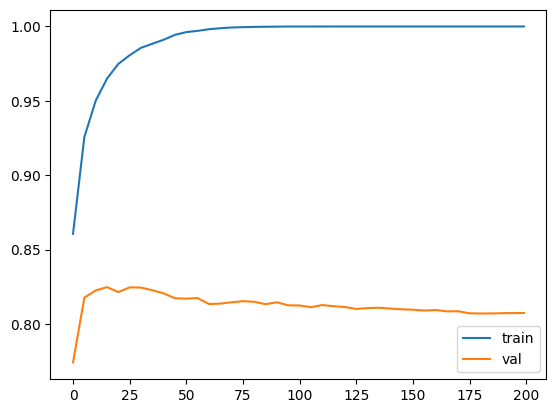

In [398]:
# x-axis - number of iterations
# y-axis - auc
plt.plot(df_score.num_iter, df_score.train_auc, label="train")
plt.plot(df_score.num_iter, df_score.val_auc, label="val")
plt.legend()

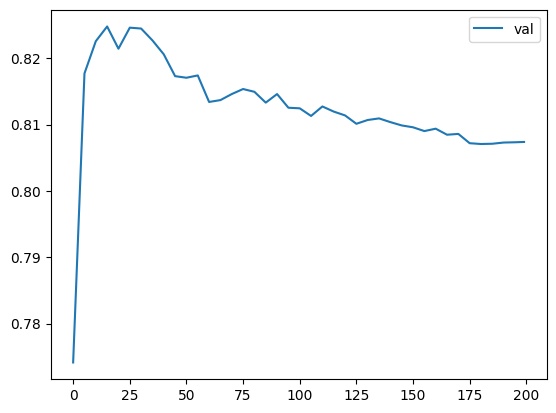

In [399]:
plt.plot(df_score.num_iter, df_score.val_auc, label="val")
plt.legend()

## Tuning Eta

### Eta = 0.3

In [400]:
scores = {}

In [401]:
%%capture output
 
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
     
    'nthread': 8,
    'seed': 1,
    'verbosity': 1
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                 verbose_eval=5,
                 evals=watchlist)

In [402]:
"eta=%s" % (xgb_params["eta"])

'eta=0.3'

In [403]:
key = "eta=%s" % (xgb_params["eta"])

In [404]:
scores[key] = parse_xgb_output(output) # type: ignore
key

'eta=0.3'

In [405]:
scores

{'eta=0.3':     num_iter  train_auc  val_auc
 0          0    0.86063  0.77414
 1          5    0.92561  0.81772
 2         10    0.95005  0.82258
 3         15    0.96498  0.82480
 4         20    0.97484  0.82145
 5         25    0.98067  0.82462
 6         30    0.98564  0.82449
 7         35    0.98838  0.82270
 8         40    0.99108  0.82060
 9         45    0.99436  0.81731
 10        50    0.99622  0.81707
 11        55    0.99706  0.81742
 12        60    0.99815  0.81342
 13        65    0.99883  0.81370
 14        70    0.99933  0.81461
 15        75    0.99954  0.81537
 16        80    0.99972  0.81495
 17        85    0.99982  0.81332
 18        90    0.99990  0.81461
 19        95    0.99996  0.81255
 20       100    0.99997  0.81246
 21       105    0.99997  0.81131
 22       110    0.99999  0.81274
 23       115    0.99999  0.81197
 24       120    1.00000  0.81139
 25       125    1.00000  0.81013
 26       130    1.00000  0.81070
 27       135    1.00000  0.81094
 28

In [406]:
scores["eta=0.3"]

,num_iter,train_auc,val_auc
0,0,0.86063,0.77414
1,5,0.92561,0.81772
2,10,0.95005,0.82258
3,15,0.96498,0.82480
4,20,0.97484,0.82145
5,25,0.98067,0.82462
6,30,0.98564,0.82449
7,35,0.98838,0.82270
8,40,0.99108,0.82060
9,45,0.99436,0.81731


### Eta = 1.0

In [407]:
%%capture output
 
xgb_params = {
    'eta': 1.0, 
    'max_depth': 6,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [408]:
key = "eta=%s" % (xgb_params["eta"])
key

'eta=1.0'

In [409]:
scores[key] = parse_xgb_output(output) # type: ignore

In [410]:
scores['eta=1.0']

,num_iter,train_auc,val_auc
0,0,0.86063,0.77414
1,5,0.95616,0.81202
2,10,0.98388,0.79879
3,15,0.99687,0.79271
4,20,0.99963,0.79052
5,25,0.99998,0.79082
6,30,1.00000,0.78906
7,35,1.00000,0.79007
8,40,1.00000,0.78844
9,45,1.00000,0.79021


### Eta = 0.1

In [411]:
%%capture output
 
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [412]:
key = "eta=%s" % (xgb_params["eta"])
key

'eta=0.1'

In [413]:
scores[key] = parse_xgb_output(output) # type: ignore

In [414]:
scores["eta=0.1"]

,num_iter,train_auc,val_auc
0,0,0.86063,0.77414
1,5,0.89881,0.81422
2,10,0.91451,0.81932
3,15,0.92764,0.82700
4,20,0.93814,0.83368
5,25,0.94570,0.83577
6,30,0.95076,0.83618
7,35,0.95556,0.83624
8,40,0.96051,0.83872
9,45,0.96344,0.84038


### Eta = 0.05

In [415]:
%%capture output
 
xgb_params = {
    'eta': 0.05, 
    'max_depth': 6,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [416]:
key = "eta=%s" % (xgb_params["eta"])
key

'eta=0.05'

In [417]:
scores[key] = parse_xgb_output(output)  # type: ignore

In [418]:
scores["eta=0.05"]

,num_iter,train_auc,val_auc
0,0,0.86063,0.77414
1,5,0.88677,0.81323
2,10,0.89776,0.81653
3,15,0.90628,0.81919
4,20,0.91429,0.82120
5,25,0.92106,0.82476
6,30,0.92583,0.82606
7,35,0.93225,0.82776
8,40,0.93718,0.82871
9,45,0.94146,0.83102


### Eta = 0.01

In [419]:
%%capture output
 
xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [420]:
key = "eta=%s" % (xgb_params["eta"])
key

'eta=0.01'

In [421]:
scores[key] = parse_xgb_output(output)  # type: ignore

In [422]:
scores["eta=0.01"]

,num_iter,train_auc,val_auc
0,0,0.86063,0.77414
1,5,0.86479,0.78046
2,10,0.87146,0.79168
3,15,0.87837,0.80523
4,20,0.88189,0.80980
5,25,0.88715,0.81329
6,30,0.88862,0.81546
7,35,0.88940,0.81445
8,40,0.89005,0.81375
9,45,0.89110,0.81275


## Plotting Eta

In [423]:
scores.keys()

dict_keys(['eta=0.3', 'eta=1.0', 'eta=0.1', 'eta=0.05', 'eta=0.01'])

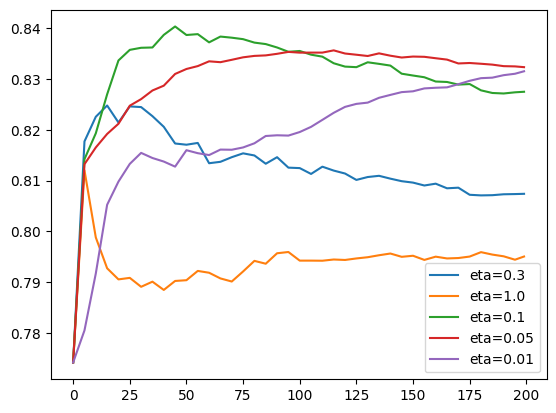

In [424]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()

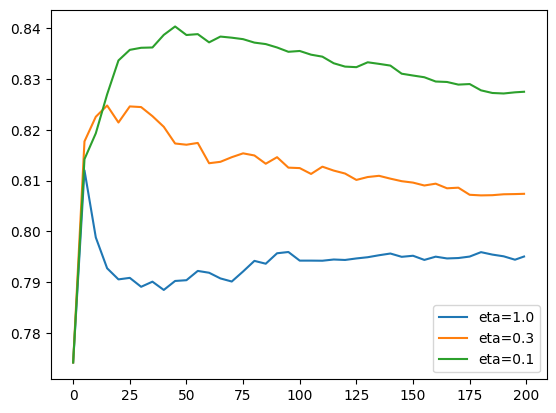

In [425]:
etas = ["eta=1.0", "eta=0.3", "eta=0.1"]
for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
plt.legend()

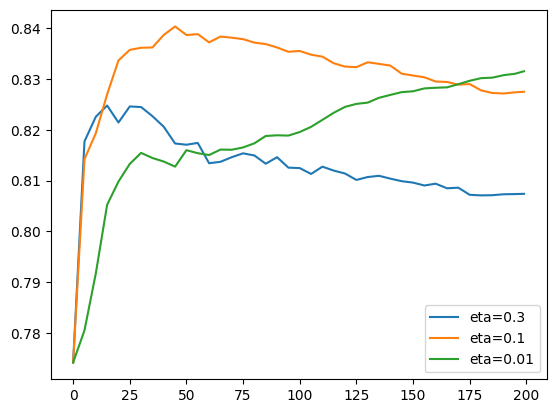

In [426]:
etas = ["eta=0.3", "eta=0.1", "eta=0.01"]
for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
plt.legend()

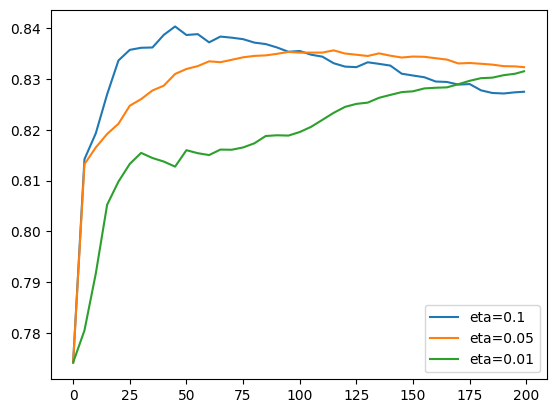

In [427]:
etas = ["eta=0.1", "eta=0.05", "eta=0.01"]
for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
plt.legend()

## Tuning max_depth

### max_depth=6

In [428]:
scores = {}

In [429]:
%%capture output
 
xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [430]:
key = "max_depth=%s" % (xgb_params["max_depth"])
key

'max_depth=6'

In [431]:
scores[key] = parse_xgb_output(output)  # type: ignore

### max_depth=3

In [432]:
%%capture output
 
xgb_params = {
    'eta': 0.01, 
    'max_depth': 3,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [433]:
key = "max_depth=%s" % (xgb_params["max_depth"])
key

'max_depth=3'

In [434]:
scores[key] = parse_xgb_output(output)  # type: ignore

### max_depth=4

In [435]:
%%capture output
 
xgb_params = {
    'eta': 0.01, 
    'max_depth': 4,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [436]:
key = "max_depth=%s" % (xgb_params["max_depth"])
key

'max_depth=4'

In [437]:
scores[key] = parse_xgb_output(output)  # type: ignore

### max_depth=10

In [438]:
%%capture output
 
xgb_params = {
    'eta': 0.01, 
    'max_depth': 10,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [439]:
key = "max_depth=%s" % (xgb_params["max_depth"])
key

'max_depth=10'

In [440]:
scores[key] = parse_xgb_output(output)  # type: ignore

## Plotting max_depth

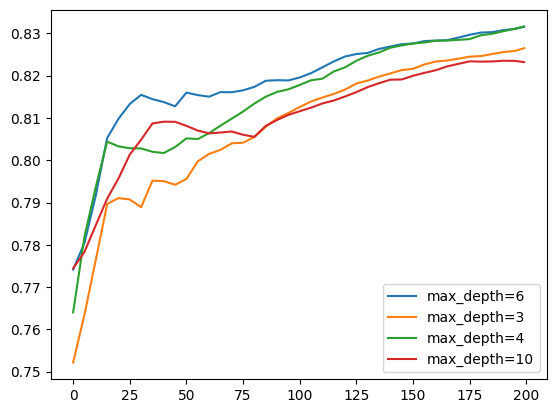

In [441]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

# plt.ylim(0.8, 0.84)
plt.legend()

In [442]:
del scores["max_depth=10"]

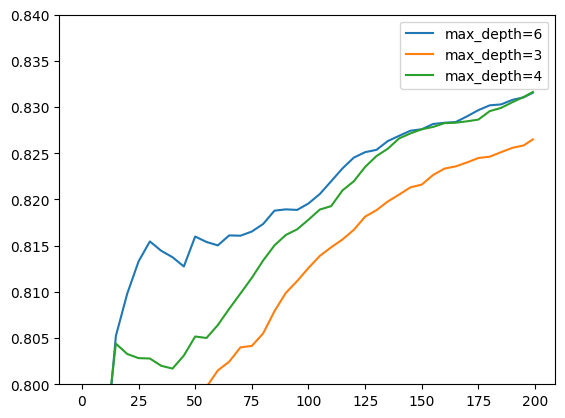

In [443]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

plt.ylim(0.8, 0.84)
plt.legend()

## Tuning min_child_weight

### min_child_weight=1

In [444]:
scores = {}

In [455]:
%%capture output
 
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [457]:
key = "min_child_weight=%s" % (xgb_params["min_child_weight"])
scores[key] = parse_xgb_output(output) # type: ignore
key

'min_child_weight=1'

### min_child_weight=10

In [458]:
%%capture output
 
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 10,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [460]:
key = "min_child_weight=%s" % (xgb_params["min_child_weight"])
scores[key] = parse_xgb_output(output) # type: ignore
key

'min_child_weight=10'

### min_child_weight=30

In [461]:
%%capture output
 
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 30,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [462]:
key = "min_child_weight=%s" % (xgb_params["min_child_weight"])
scores[key] = parse_xgb_output(output) # type: ignore
key

'min_child_weight=30'

## Plotting min_child_weight

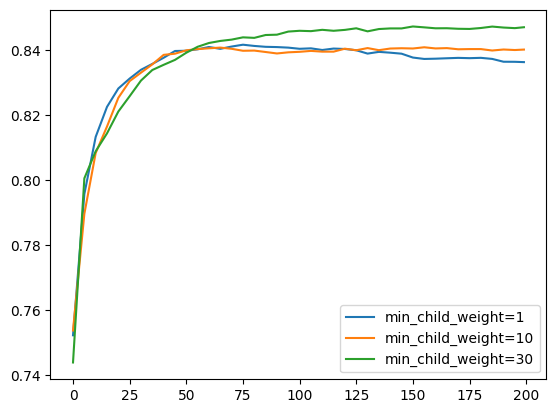

In [464]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)

plt.legend()

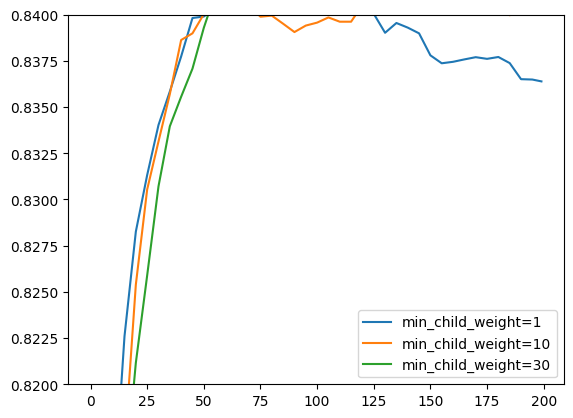

In [465]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)

plt.ylim(0.82, 0.84)
plt.legend()

## Train final model

In [466]:
xgb_params = {
    "eta": 0.1,
    "max_depth": 3,
    "min_child_weight": 30,
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "nthread": 8,
    "seed": 1,
    "verbosity": 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

## Choosing between XGBoost, random forest and decision tree
- Retrain the best model of each type

In [468]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,15
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [469]:
rf = RandomForestClassifier(
    n_estimators=200, max_depth=10, min_samples_leaf=3, random_state=1
)
rf.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [471]:
gb_params = {
    "eta": 0.1,
    "max_depth": 3,
    "min_child_weight": 1,
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "nthread": 8,
    "seed": 1,
    "verbosity": 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

## Evaluate all the best of models on validation data

In [472]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7863199792333652

In [475]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8364998331252549

In [478]:
y_pred = model.predict(dval)
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8466791925734558

## Training the final model

In [480]:
df_full_train

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
1860,ok,6,other,30,22,single,no,fixed,35,73.0,0.0,0.0,1086,1086
4154,ok,45,owner,30,64,married,no,freelance,45,157.0,20000.0,0.0,1000,1588
1754,ok,2,owner,60,30,married,yes,fixed,45,174.0,4000.0,0.0,2000,2250
1779,ok,11,rent,60,28,married,no,fixed,59,144.0,0.0,0.0,1225,1360
279,ok,2,parents,36,19,married,no,fixed,35,162.0,4000.0,100.0,400,570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,default,4,owner,60,47,married,no,freelance,75,0.0,13500.0,0.0,1900,1976
1293,ok,2,rent,60,28,single,no,fixed,45,101.0,0.0,0.0,1300,1333
4023,default,24,other,60,41,married,yes,freelance,75,0.0,0.0,0.0,2200,2428
3775,default,2,rent,48,56,single,no,freelance,51,157.0,11000.0,4500.0,1000,2008


In [485]:
df_full_train = df_full_train.reset_index(drop=True)

In [486]:
y_full_train = (df_full_train.status == "default").astype(int).values
y_full_train

array([0, 0, 0, ..., 1, 1, 1], shape=(3564,))

In [487]:
del df_full_train["status"]

In [488]:
dicts_full_train = df_full_train.to_dict(orient="records")

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient="records")
X_test = dv.transform(dicts_test)

In [489]:
feature_names = list(dv.get_feature_names_out())
feature_names

['age',
 'amount',
 'assets',
 'debt',
 'expenses',
 'home=ignore',
 'home=other',
 'home=owner',
 'home=parents',
 'home=private',
 'home=rent',
 'home=unk',
 'income',
 'job=fixed',
 'job=freelance',
 'job=others',
 'job=partime',
 'job=unk',
 'marital=divorced',
 'marital=married',
 'marital=separated',
 'marital=single',
 'marital=unk',
 'marital=widow',
 'price',
 'records=no',
 'records=yes',
 'seniority',
 'time']

In [490]:
feature_names = list(dv.get_feature_names_out())
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=feature_names)

dtest = xgb.DMatrix(X_test, feature_names=feature_names)

In [491]:
xgb_params = {
    "eta": 0.1,
    "max_depth": 3,
    "min_child_weight": 1,
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "nthread": 8,
    "seed": 1,
    "verbosity": 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=175)

## Evaluate the final model¶

In [492]:
y_pred = model.predict(dtest)
roc_auc_score(y_test, y_pred)

0.8334907182729892